In [4]:
%load_ext autoreload
%autoreload 2

### target 
- increase the capacity of the model and prevent overfitting.
### results 
- train Accuracy: 98.30
- test Accuracy: 98.39
### analysis
- Model is working as expected, here also I didn't take into consideration the receptive field, so both train and test accuracy is low. It is not overfitting because I added dropout layers

In [1]:
from data import get_data
from model import Model_2
from utils import train, test
import torch
import torch.optim as optim


In [2]:
train_data = get_data(train=True)
test_data = get_data(train=False)

In [3]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

CUDA Available? True


In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = Model_2().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 20, 22, 22]           1,800
      BatchNorm2d-10           [-1, 20, 22, 22]              40
             ReLU-11           [-1, 20, 22, 22]               0
          Dropout-12           [-1, 20, 22, 22]               0
        MaxPool2d-13           [-1, 20, 11, 11]               0
           Conv2d-14           [-1

In [9]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

model = Model_2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test(model, device, test_loader, test_losses, test_acc)

EPOCH: 0


Loss=0.44934332370758057 Batch_id=468 Accuracy=60.70: 100%|██████████| 469/469 [00:07<00:00, 65.96it/s]



Test set: Average loss: 0.4528, Accuracy: 8920/10000 (89.20%)

EPOCH: 1


Loss=0.1954948753118515 Batch_id=468 Accuracy=94.36: 100%|██████████| 469/469 [00:07<00:00, 65.12it/s] 



Test set: Average loss: 0.2101, Accuracy: 9412/10000 (94.12%)

EPOCH: 2


Loss=0.12526585161685944 Batch_id=468 Accuracy=96.14: 100%|██████████| 469/469 [00:07<00:00, 64.48it/s] 



Test set: Average loss: 0.1535, Accuracy: 9517/10000 (95.17%)

EPOCH: 3


Loss=0.08806579560041428 Batch_id=468 Accuracy=96.77: 100%|██████████| 469/469 [00:07<00:00, 64.94it/s] 



Test set: Average loss: 0.0778, Accuracy: 9766/10000 (97.66%)

EPOCH: 4


Loss=0.06752952188253403 Batch_id=468 Accuracy=97.11: 100%|██████████| 469/469 [00:07<00:00, 63.30it/s] 



Test set: Average loss: 0.1061, Accuracy: 9671/10000 (96.71%)

EPOCH: 5


Loss=0.08178465813398361 Batch_id=468 Accuracy=97.32: 100%|██████████| 469/469 [00:08<00:00, 55.54it/s] 



Test set: Average loss: 0.0924, Accuracy: 9710/10000 (97.10%)

EPOCH: 6


Loss=0.10660865157842636 Batch_id=468 Accuracy=97.53: 100%|██████████| 469/469 [00:07<00:00, 63.14it/s] 



Test set: Average loss: 0.0503, Accuracy: 9846/10000 (98.46%)

EPOCH: 7


Loss=0.09761995077133179 Batch_id=468 Accuracy=97.74: 100%|██████████| 469/469 [00:07<00:00, 59.02it/s] 



Test set: Average loss: 0.0618, Accuracy: 9801/10000 (98.01%)

EPOCH: 8


Loss=0.059925347566604614 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:07<00:00, 61.96it/s]



Test set: Average loss: 0.0703, Accuracy: 9780/10000 (97.80%)

EPOCH: 9


Loss=0.09312314540147781 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:07<00:00, 62.73it/s] 



Test set: Average loss: 0.0519, Accuracy: 9839/10000 (98.39%)

EPOCH: 10


Loss=0.05944694206118584 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:07<00:00, 62.24it/s] 



Test set: Average loss: 0.0432, Accuracy: 9862/10000 (98.62%)

EPOCH: 11


Loss=0.03427550941705704 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:07<00:00, 61.00it/s] 



Test set: Average loss: 0.0550, Accuracy: 9834/10000 (98.34%)

EPOCH: 12


Loss=0.03797977790236473 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:08<00:00, 57.91it/s] 



Test set: Average loss: 0.0580, Accuracy: 9820/10000 (98.20%)

EPOCH: 13


Loss=0.1663835495710373 Batch_id=468 Accuracy=98.18: 100%|██████████| 469/469 [00:07<00:00, 61.27it/s]  



Test set: Average loss: 0.0641, Accuracy: 9796/10000 (97.96%)

EPOCH: 14


Loss=0.09642324596643448 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:08<00:00, 57.38it/s] 



Test set: Average loss: 0.0597, Accuracy: 9810/10000 (98.10%)



In [10]:
t = [t_items.item() for t_items in train_losses]

Text(0.5, 1.0, 'Test Accuracy')

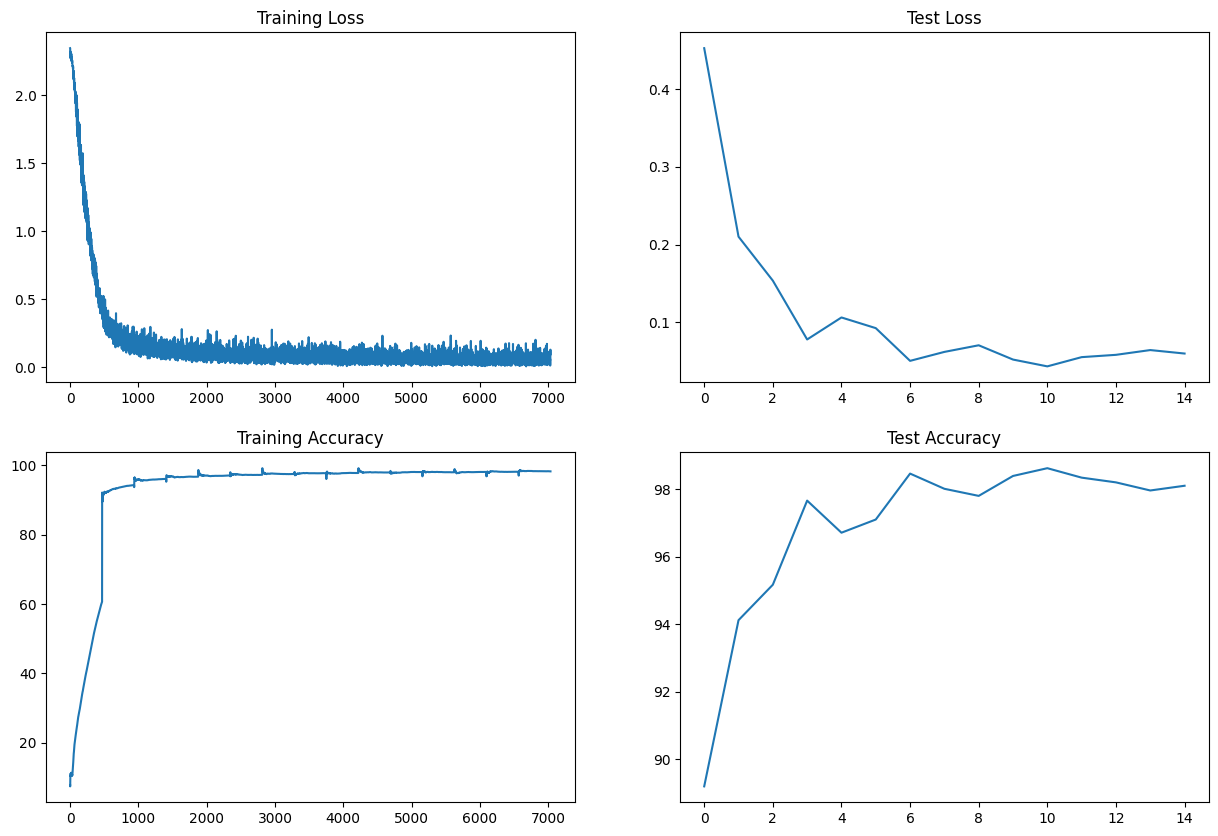

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")